<a href="https://colab.research.google.com/github/nisher07/SpaceX-First-Stage-Landing-Prediction/blob/main/SpaceX_EDA_dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Exploring and Preparing Data


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


***


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [ ]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


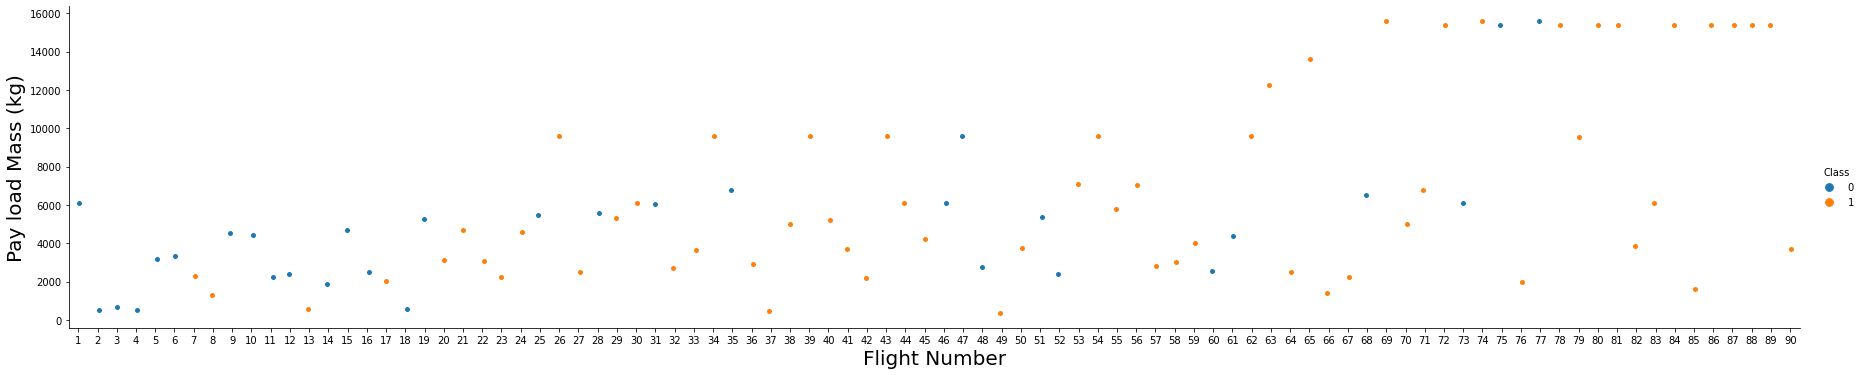

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


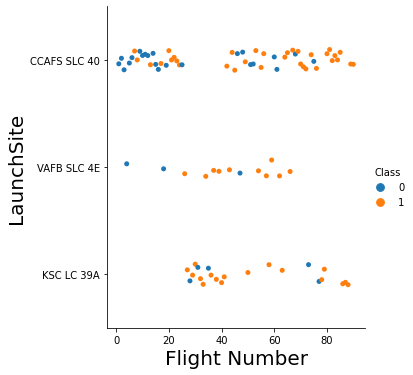

In [ ]:
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


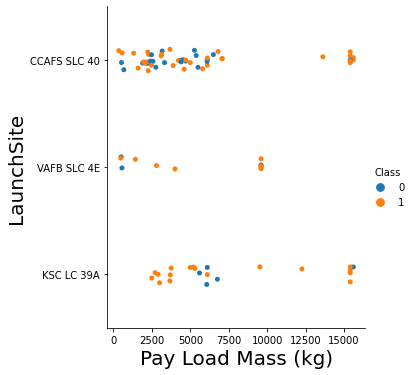

In [ ]:
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df)
plt.xlabel("Pay Load Mass (kg)",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [ ]:
df.groupby('Orbit')['Class'].mean()

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64

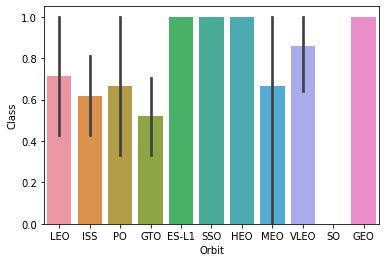

In [ ]:
sns.barplot(x="Orbit", y="Class", data=df)

Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


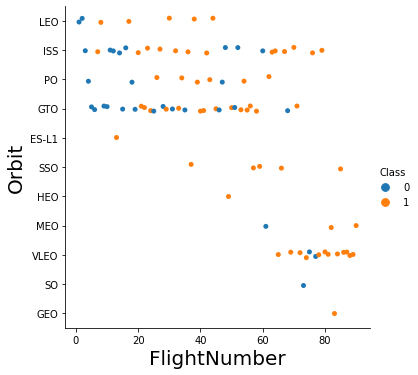

In [ ]:
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df)
plt.xlabel("FlightNumber",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

We see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


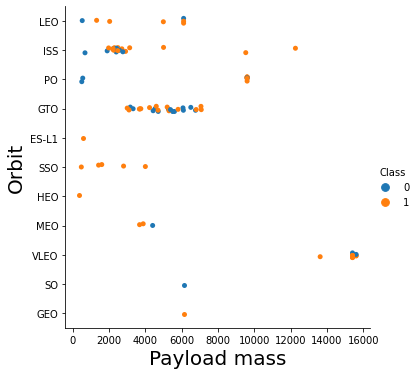

In [ ]:
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df)
plt.xlabel("Payload mass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

You should observe that Heavy payloads have a negative influence on GTO orbits and positive on GTO and Polar LEO (ISS) orbits.


### TASK  6: Visualize the launch success yearly trend


In [ ]:
year=[]
def Extract_year(Date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
 

In [ ]:
df1 = pd.DataFrame(Extract_year(df['Date']), columns = ['year'])   
df1['Class'] = df['Class']
df1

,year,Class
0,2010,0.0
1,2012,0.0
2,2013,0.0
3,2013,0.0
4,2013,0.0
...,...,...
355,2020,NaN
356,2020,NaN
357,2020,NaN
358,2020,NaN


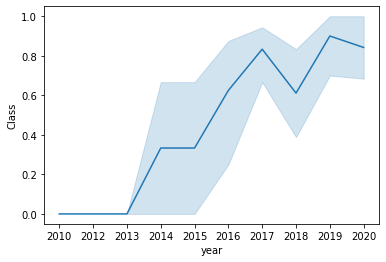

In [ ]:
sns.lineplot(data=df1, x="year", y="Class")

We observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [ ]:
features_one_hot = pd.concat([features,pd.get_dummies(df[['Orbit','LaunchSite','LandingPad','Serial']])], axis=1)
features_one_hot.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,...,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [ ]:
features_one_hot.astype

<bound method NDFrame.astype of     FlightNumber   PayloadMass Orbit  ... Serial_B1059  Serial_B1060  Serial_B1062
0              1   6104.959412   LEO  ...            0             0             0
1              2    525.000000   LEO  ...            0             0             0
2              3    677.000000   ISS  ...            0             0             0
3              4    500.000000    PO  ...            0             0             0
4              5   3170.000000   GTO  ...            0             0             0
..           ...           ...   ...  ...          ...           ...           ...
85            86  15400.000000  VLEO  ...            0             1             0
86            87  15400.000000  VLEO  ...            0             0             0
87            88  15400.000000  VLEO  ...            0             0             0
88            89  15400.000000  VLEO  ...            0             1             0
89            90   3681.000000   MEO  ...            0 

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>
